# Recipe generation 

The command generator require the recipe of full genotypes, phenotypes, and covariates data to produce the desire results.

## Phenotypes
There are 3 brain regions, cross with 30 celltypes, for each way of clustering. For the sake of simplicity. I will use only the subclass ones for starters.

In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
a = read_delim("../working//subclass_phenotype_list",col_names = F)

Rows: 90 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
a = a %>%select(Theme = X1, molecular_phenotype = X2)

#### Exam the number of samples and genes for each phenotypes.

In [ ]:
df = a%>%mutate(pheno_table = map(molecular_phenotype, ~read_delim(.x,"\t")))

In [10]:
df = df%>%mutate(n_sample = map_dbl(pheno_table, ~ncol(.x)), n_genes = map_dbl(pheno_table, ~nrow(.x)) )

In [11]:
df

ERROR while rich displaying an object: Error in paste(print_output, collapse = "\n"): result would exceed 2^31-1 bytes

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.data.frame(obj)


In [12]:
df%>%select(-pheno_table)%>%filter(n_sample < 40 | n_genes < 500)%>%pull(Theme) -> removed_Theme

In [13]:
df%>%mutate(samples = map(pheno_table,~colnames(.x)) ) -> df

In [14]:
df%>%pull(samples)%>%unlist()%>%unique-> phenotype_sample_id

In [15]:
a = a%>%filter(!Theme %in% removed_Theme   )

In [16]:
df%>%filter(!Theme %in% removed_Theme, n_sample < 100)%>%select(Theme,n_sample)

Theme,n_sample
<chr>,<dbl>
EN_L2_3|3_5_IT_mixture.EC,87
EN_L2_3|3_5_IT_mixture.PFC,81
EN_L3_5_IT_4.EC,97
EN_L5_6_NP.EC,88
EN_L5_6_NP.STG,94
EN_L6B.EC,68
EN_L6B.STG,96
EN_L6_CT.EC,96
EN_L6_IT_1.EC,83


In [17]:
removed_Theme

[1] "SMC.EC"               "SMC.PFC"              "SMC.STG"             
[4] "Vascular_mixture.EC"  "Vascular_mixture.PFC" "Vascular_mixture.STG"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


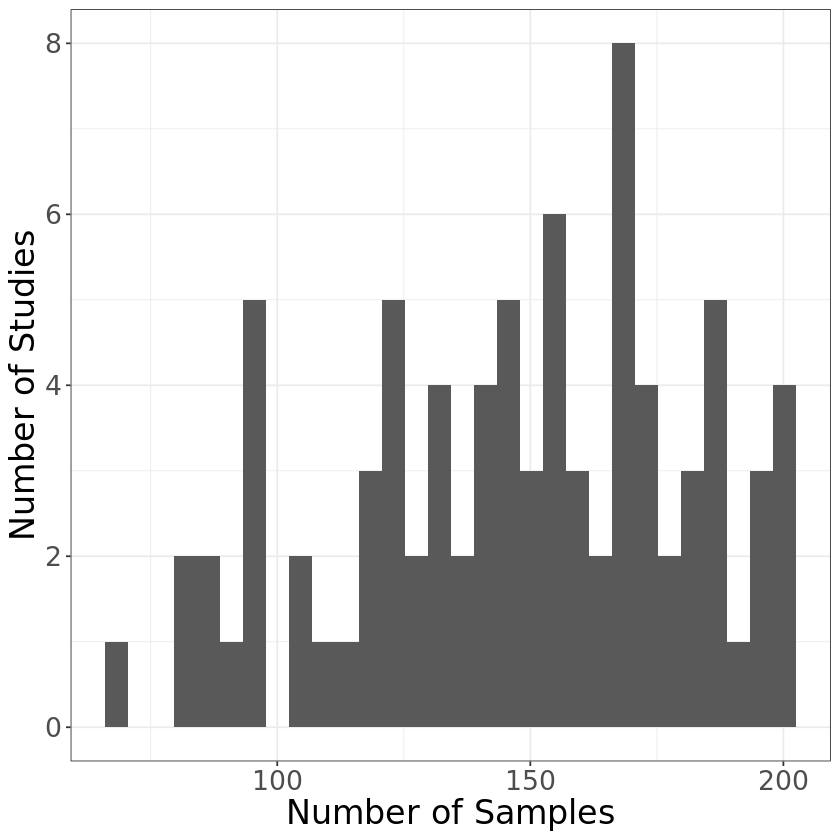

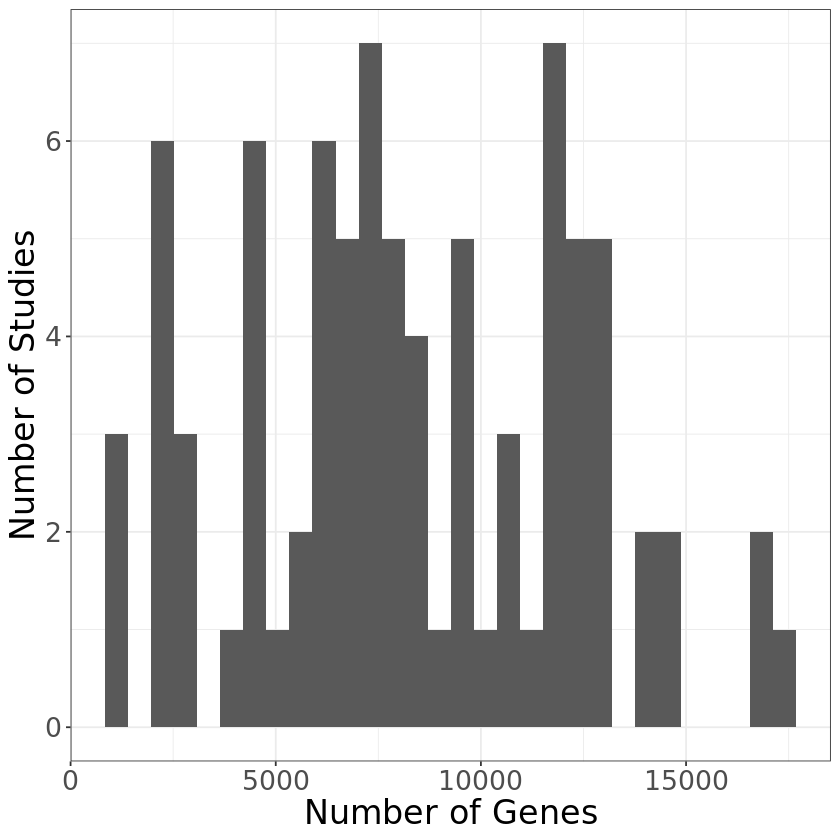

In [18]:
df%>%filter(!Theme %in% removed_Theme)%>%ggplot()+geom_histogram(aes(x = n_sample))+xlab("Number of Samples")+ ylab("Number of Studies")+theme_bw()+theme(text = element_text(size = 20))
df%>%filter(!Theme %in% removed_Theme)%>%ggplot()+geom_histogram(aes(x = n_genes))+xlab("Number of Genes")+ ylab("Number of Studies")+theme_bw()+theme(text = element_text(size = 20))

In [19]:
df%>%nrow

[1] 90

In [20]:
df%>%colnames

[1] "Theme"               "molecular_phenotype" "pheno_table"        
[4] "n_sample"            "n_genes"             "samples"

## Covariates
Per the xQTL pipeline protocol, only select limited number of covariates

In [66]:

cov = read_delim("/sc/arion/projects/CommonMind/roussp01a/snmulti/step2/metadata/syn26720956_clinical_metadata_12072023.csv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1778 Columns: 383
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (19): SubID, Brain_bank, Sex, Ethnicity, Dx, Source_Location, Death_Se...
dbl  (323): Age, pH, PMI, Death_Day, Death_Month, CERAD, BRAAK_AD, BRAAK_PD,...
lgl   (40): Sex_chr_aneuploidy, SNParray_HBBC, nps_MoodDysCurValue, nps_DecI...
time   (1): Death_Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [67]:
cov%>%colnames

[1] "SubID"                                 
  [2] "Brain_bank"                            
  [3] "Age"                                   
  [4] "Sex"                                   
  [5] "Sex_chr_aneuploidy"                    
  [6] "Ethnicity"                             
  [7] "Dx"                                    
  [8] "pH"                                    
  [9] "PMI"                                   
 [10] "Source_Location"                       
 [11] "Death_Time"                            
 [12] "Death_Day"                             
 [13] "Death_Month"                           
 [14] "Death_Season"                          
 [15] "CERAD"                                 
 [16] "BRAAK_AD"                              
 [17] "BRAAK_PD"                              
 [18] "CDRScore"                              
 [19] "Plq_Mn"                                
 [20] "Plq_Mn_MFG"                            
 [21] "ApoE_gt"                               
 [22] "CMC_individual_ID"                     
 [23] "AMPAD_msbb_individualID"               
 [24] "snRNAseq_ID"                           
 [25] "AD"                                    
 [26] "MCI"                                   
 [27] "Dementia"                              
 [28] "PD"                                    
 [29] "PD_uncertain_plus_encephalitic"        
 [30] "DLBD"                                  
 [31] "FTD"                                   
 [32] "ALS"                                   
 [33] "NormPressHydrocephalus"                
 [34] "ArgyrophilicGrain"                     
 [35] "CerebralAtrophy"                       
 [36] "Tauopathy"                             
 [37] "Others_Neurodegenerative"              
 [38] "MS"                                    
 [39] "PSP"                                   
 [40] "Epilepsy"                              
 [41] "Seizures"                              
 [42] "Tumor"                                 
 [43] "Migraine_headaches"                    
 [44] "Head_Injury"                           
 [45] "Vascular"                              
 [46] "Others_Neurological"                   
 [47] "Leucotomy"                             
 [48] "SCZ"                                   
 [49] "MDD"                                   
 [50] "BD_unspecific"                         
 [51] "BD_I"                                  
 [52] "BD_II"                                 
 [53] "PTSD"                                  
 [54] "ADHD"                                  
 [55] "OCD"                                   
 [56] "Tardive_Dyskinesia_Neuroleptic_induced"
 [57] "Schizoaffective_bipolar"               
 [58] "Schizoaffective_depressive"            
 [59] "Anorexia"                              
 [60] "Bulimia"                               
 [61] "Anxiety"                               
 [62] "Binge_Purge"                           
 [63] "Eating_disorder"                       
 [64] "Others_Neuropsychiatric"               
 [65] "Diabetes_mellitus_unspecified"         
 [66] "ASHCVD"                                
 [67] "TD_I"                                  
 [68] "TD_II"                                 
 [69] "primary_genotype"                      
 [70] "SNParray_HBBC"                         
 [71] "SNParray_CommonMind"                   
 [72] "WGS_CommonMind"                        
 [73] "WGS_RUSH"                              
 [74] "WGS_Ampad"                             
 [75] "SNParray_Microglia"                    
 [76] "SNParray_PsychAD"                      
 [77] "ADSP_SampleId"                         
 [78] "Imaging_XENum"                         
 [79] "nps_MoodDysCurValue"                   
 [80] "nps_DecIntCurValue"                    
 [81] "nps_WtLossCurValue"                    
 [82] "nps_DecAppCurValue"                    
 [83] "nps_WtGainCurValue"                    
 [84] "nps_EarlyInsomCurValue"                
 [85] "nps_MidInsomCurValue"                  
 [86] "

In [68]:
sample_participant_lookup = read_delim("../input//snmulti_QTL_sample_participant_lookup")

Rows: 592 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): sample_id, participant_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [70]:
sample_participant_lookup= sample_participant_lookup%>%select(genotype_id = participant_id ,  sample_id )
sample_participant_lookup%>%write_delim("../input//snmulti_QTL_sample_participant_lookup_re","\t")

In [71]:
cov3 = read_delim("/sc/arion/projects/CommonMind/roussp01a/snmulti/step2/files/genotype_merged.csv")
cov4 = read_delim("/sc/arion/projects/CommonMind/roussp01a/snmulti/step2/files/no_genotype_merged.csv")

New names:
• `` -> `...1`
Rows: 574 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, SubID, order, ADSP_WGS, PsychAD_SNParray, SNParray_CommonMind...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 25 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ...1, unique_sample_ID, newID, match, Sex, Race, order, ADSP_WGS
dbl (6): Barcode, SubNum_predict, SubNum_label, WGS.ID, Age.of.death, BB
lgl (1): PsychAD_SNParray

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Match SubID, genotype ID and phenotype ID

In [72]:
cov = inner_join(cov,inner_join(rbind(cov3%>%select(SubID,order),  cov4%>%mutate(SubID = paste0("M",SubNum_predict))%>%select(SubID,order)),sample_participant_lookup, by = c("order" = "sample_id" )))

Joining with `by = join_by(SubID)`


In [ ]:
sample_participant_lookup$genotype_id

#### Check if the covariates for each genotype ID is consistant

In [76]:
cov%>%select(genotype_id, order, Age,Sex,PMI )%>%count(genotype_id,Age,Sex,PMI)%>%count(genotype_id)%>%filter(n > 1)

genotype_id,n
<chr>,<int>


#### Check NA

In [77]:
cov%>%select(genotype_id, order, Age,Sex,PMI )%>%count(genotype_id,Age,Sex,PMI)%>%nrow - 
cov%>%select(genotype_id, order, Age,Sex,PMI )%>%count(genotype_id,Age,Sex,PMI)%>%na.omit%>%nrow

[1] 0

#### Output Covariates File

In [82]:
covt = cov%>%count(genotype_id,Age,Sex,PMI)%>%mutate(Sex = as.numeric(Sex == "Male"))%>%select(-n)


In [79]:
covt = covt%>%t%>%as_tibble()%>%`colnames<-`(covt$genotype_id)

In [86]:
covt%>%select("#id" = genotype_id, age = Age, sex = Sex, pmi = PMI) %>%write_delim("../input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv","\t")

In [87]:
covt = read_delim("../input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv","\t")

Rows: 246 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): #id
dbl (3): age, sex, pmi

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
## Add covt to command generator recipe

In [57]:
a = a%>%mutate(covariate = "/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv" )

In [56]:
a = a%>%select(-covariate,-covariate_file)

In [58]:
a = a%>%mutate(covariate = "/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv" )
a%>%mutate(genotype_file = "/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed")%>%rename(covariate_file = covariate)-> a

In [61]:
a = a%>%rename(molecular_pheno = molecular_phenotype)

In [62]:
a%>%write_delim("/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_analysis_recipe.tsv","\t")

In [36]:
sample_participant_lookup%>%filter(!participant_id %in% cov$participant_id)

sample_id,participant_id
<chr>,<chr>
X570,G-MSBB-MB000040-BR-MSBB-70659
X372,G-MSBB-MB000040-BR-MSBB-70659
X451,G-MSBB-MB000040-BR-MSBB-70659
X375,G-MSBB-MB000138-BR-MSBB-71778
X495,G-MSBB-MB000138-BR-MSBB-71778


In [37]:
cov%>%filter(SubID == "M70659")

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


SubID,Brain_bank,Age,Sex,Sex_chr_aneuploidy,Ethnicity,Dx,pH,PMI,Source_Location,⋯,CDR_Orientation,CDR_Judgement,CDR_Community,CDR_HomeHobbies,CDR_PersonalCare,CDR_SumBoxes,Cognitive_Resilience,Cognitive_and_Tau_Resilience,order,participant_id
<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


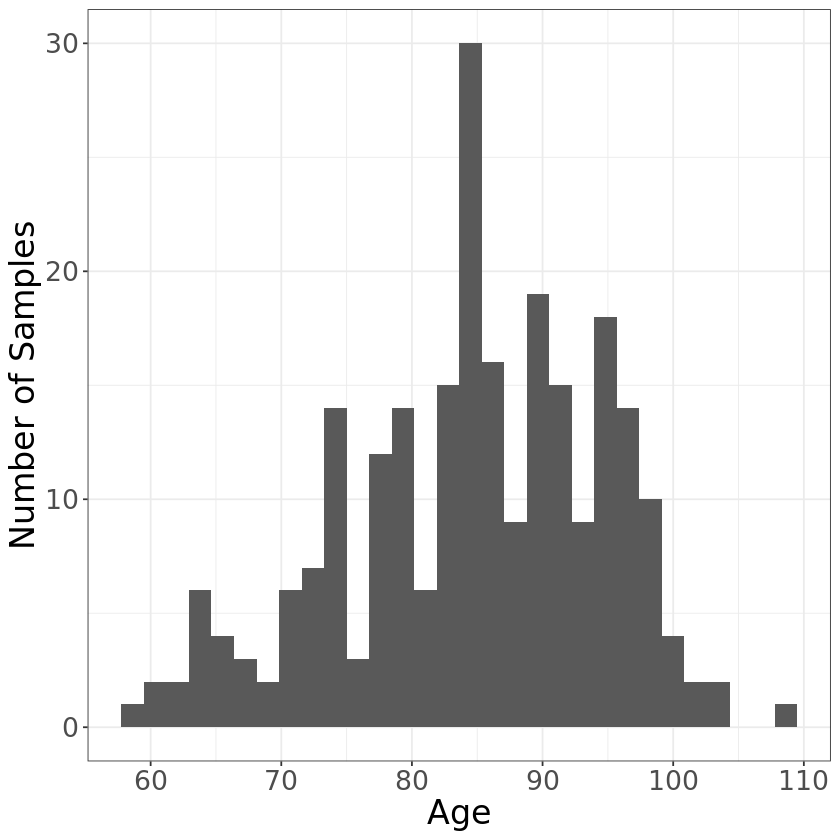

In [38]:
cov%>%count(participant_id,Age,Sex,PMI)%>%ggplot()+geom_histogram(aes(x = Age))+theme_bw()+ theme(text = element_text(size = 20))+ylab("Number of Samples")

Warning message in geom_histogram(aes(x = PMI), stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


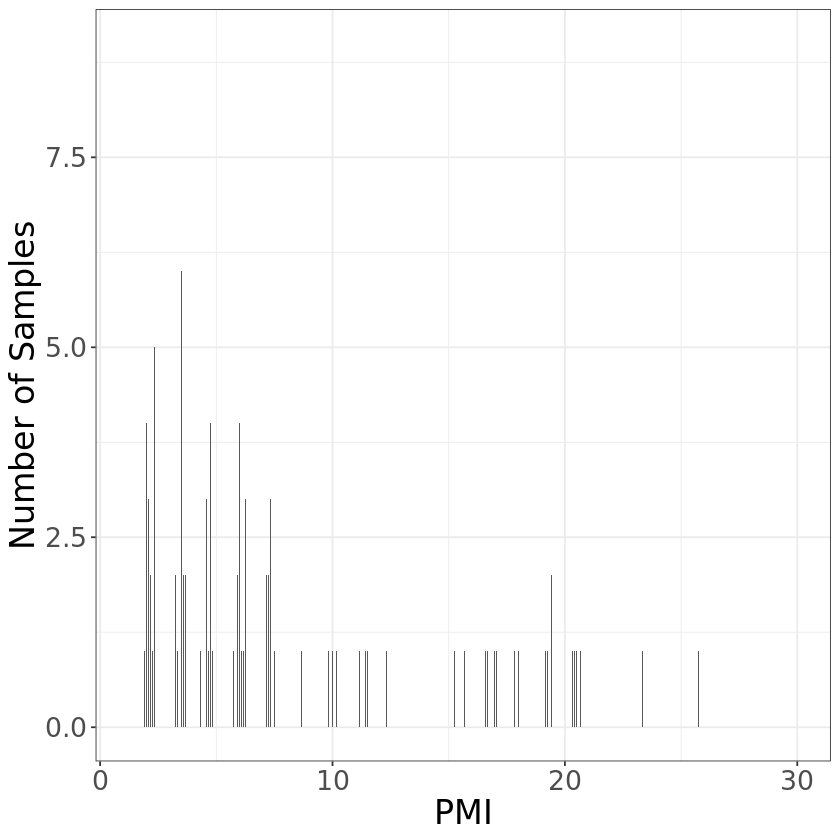

In [39]:
cov%>%count(participant_id,Age,Sex,PMI)%>%ggplot()+geom_histogram(aes(x = PMI),stat="count")+theme_bw()+ theme(text = element_text(size = 20))+ylab("Number of Samples")

Warning message in geom_histogram(aes(x = Ethnicity), stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


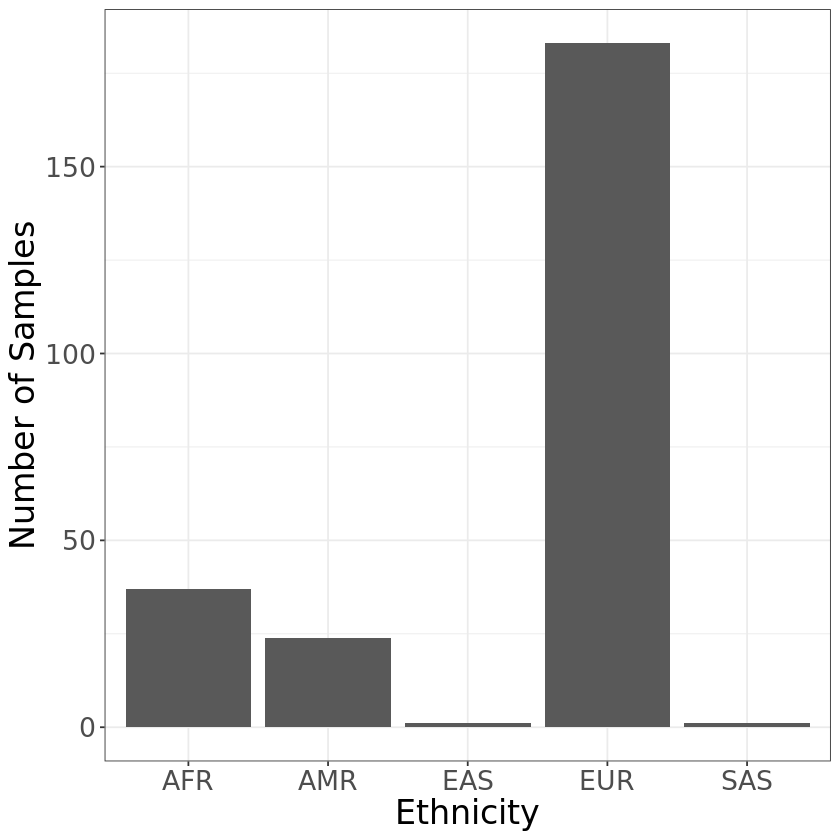

In [40]:
cov%>%count(participant_id,Ethnicity,Age,Sex,PMI)%>%ggplot()+geom_histogram(aes(x = Ethnicity),stat="count")+theme_bw()+ theme(text = element_text(size = 20))+ylab("Number of Samples")

In [41]:
((sample_participant_lookup%>%filter(!participant_id %in% cov$participant_id))$sample_id %in% df$samples) -> missing_samples

In [42]:
df$Theme[map(df$samples, ~any((sample_participant_lookup%>%filter(!participant_id %in% cov$participant_id))$sample_id %in% .x) )%>%unlist%>%which]
df$n_sample[map(df$samples, ~any((sample_participant_lookup%>%filter(!participant_id %in% cov$participant_id))$sample_id %in% .x) )%>%unlist%>%which]

[1] "Astro.EC"             "Astro.PFC"            "Astro.STG"           
 [4] "Endo.EC"              "Endo.STG"             "Immune.EC"           
 [7] "Immune.PFC"           "Immune.STG"           "IN_low.PFC"          
[10] "IN_low.STG"           "IN_VIP.STG"           "Micro.EC"            
[13] "Micro.PFC"            "Micro.STG"            "Oligo.EC"            
[16] "Oligo.PFC"            "Oligo.STG"            "OPC.EC"              
[19] "OPC.PFC"              "OPC.STG"              "PC.EC"               
[22] "PC.STG"               "Vascular_mixture.EC"  "Vascular_mixture.PFC"
[25] "Vascular_mixture.STG" "VLMC.STG"

[1] 187 200 195 154 169 121 119 126 111 142 184 187 200 193 187 200 195 186 200
[20] 194 153 169  26  16  30 156

In [43]:
missing_samples

[1] FALSE FALSE FALSE FALSE FALSE

In [2]:
import pandas as pd

In [3]:
genotype_list = pd.read_csv("/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL/output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.genotype_by_chrom_files.txt","\t")

/opt/conda/envs/TensorQTL/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
../input/reference_data/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.gtf

,#id,#path
0,7,/sc/arion/projects/CommonMind/roussp01a/snmult...
1,15,/sc/arion/projects/CommonMind/roussp01a/snmult...
2,10,/sc/arion/projects/CommonMind/roussp01a/snmult...
3,2,/sc/arion/projects/CommonMind/roussp01a/snmult...
4,4,/sc/arion/projects/CommonMind/roussp01a/snmult...
5,22,/sc/arion/projects/CommonMind/roussp01a/snmult...
6,9,/sc/arion/projects/CommonMind/roussp01a/snmult...
7,17,/sc/arion/projects/CommonMind/roussp01a/snmult...
8,12,/sc/arion/projects/CommonMind/roussp01a/snmult...
9,8,/sc/arion/projects/CommonMind/roussp01a/snmult...


In [ ]:
/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_analysis_recipe_atac.tsv

In [4]:
a = read_delim("../working//subclass_phenotype_list_atac",col_names = F)

Rows: 89 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
a = a %>%select(Theme = X1, molecular_phenotype = X2)

In [6]:
df = a%>%mutate(pheno_table = map(molecular_phenotype, ~read_delim(.x,"\t")))

Rows: 84611 Columns: 189
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): #id
dbl (188): X197, X199, X200, X202, X204, X206, X207, X208, X213, X219, X220,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 96431 Columns: 203
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): #id
dbl (202): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 82080 Columns: 196
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): #id
dbl (195): X190, X191, X192, X193, X194, X195, X196, X198, X201, X203, X205,...

ℹ Use `spec()` to retrieve the full co

In [8]:
df = df%>%mutate(n_sample = map_dbl(pheno_table, ~ncol(.x)), n_genes = map_dbl(pheno_table, ~nrow(.x)) )

In [28]:
df%>%select(-pheno_table)%>%filter(n_sample < 50 | n_genes < 500)%>%pull(Theme) -> removed_Theme

In [29]:
length(removed_Theme)

[1] 14

In [30]:
removed_Theme

[1] "Endo.EC"                    "Endo.PFC"                  
 [3] "Endo.STG"                   "EN_L2_3_3_5_IT_mixture.EC" 
 [5] "EN_L2_3_3_5_IT_mixture.PFC" "EN_L2_3_3_5_IT_mixture.STG"
 [7] "EN_L6B.EC"                  "IN_low.PFC"                
 [9] "PC.EC"                      "SMC.PFC"                   
[11] "SMC.STG"                    "Vascular_mixture.EC"       
[13] "Vascular_mixture.PFC"       "Vascular_mixture.STG"

In [31]:
df%>%mutate(samples = map(pheno_table,~colnames(.x)) ) -> df

In [32]:
df%>%filter(n_sample <50)%>%pull("Theme")

[1] "SMC.PFC"              "SMC.STG"              "Vascular_mixture.EC" 
[4] "Vascular_mixture.PFC" "Vascular_mixture.STG"

In [ ]:
re

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


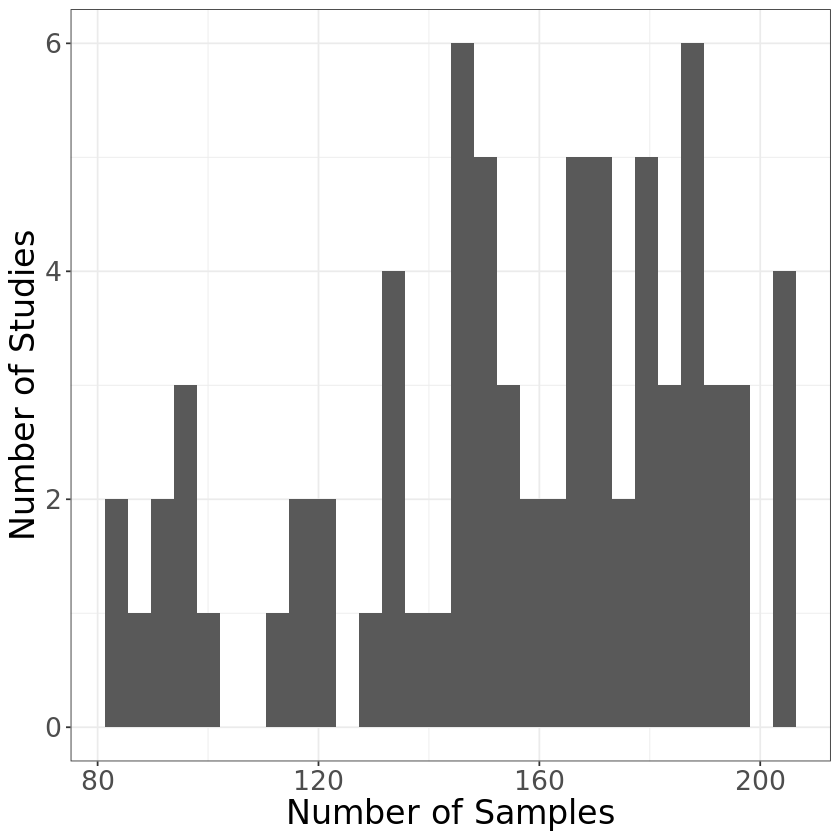

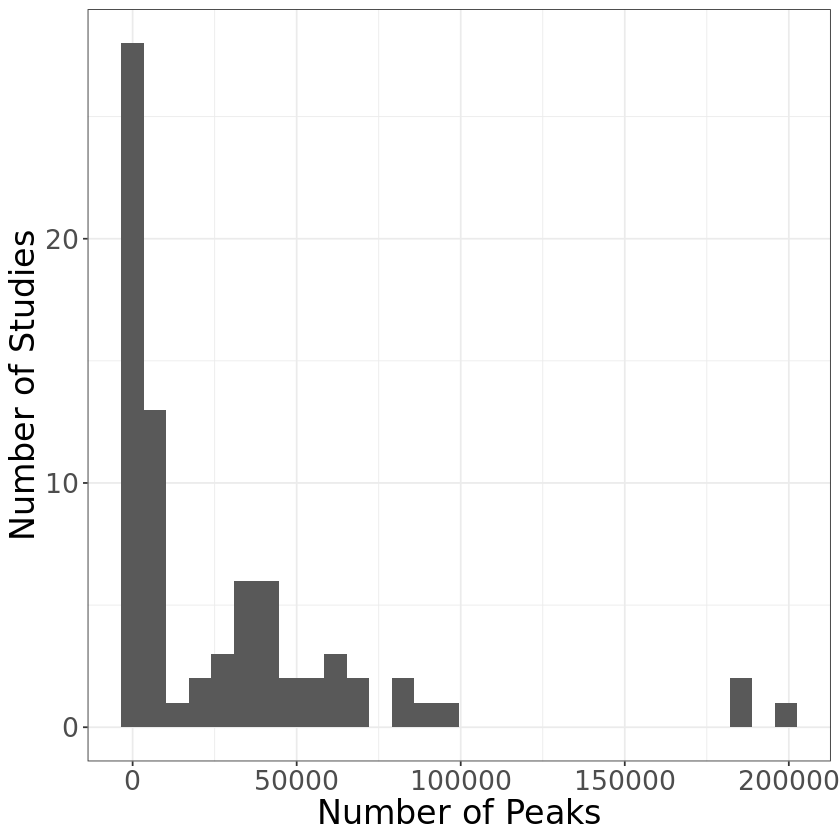

In [14]:
df%>%filter(!Theme %in% removed_Theme)%>%ggplot()+geom_histogram(aes(x = n_sample))+xlab("Number of Samples")+ ylab("Number of Studies")+theme_bw()+theme(text = element_text(size = 20))
df%>%filter(!Theme %in% removed_Theme)%>%ggplot()+geom_histogram(aes(x = n_genes))+xlab("Number of Peaks")+ ylab("Number of Studies")+theme_bw()+theme(text = element_text(size = 20))

In [37]:
a

Theme,molecular_pheno,covariate_file,genotype_file
<chr>,<chr>,<chr>,<chr>
Astro.EC,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.Astro.EC.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
Astro.PFC,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.Astro.PFC.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
Astro.STG,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.Astro.STG.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
EN_L2_3_IT_1.EC,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.EN_L2_3_IT_1.EC.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
EN_L2_3_IT_1.PFC,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.EN_L2_3_IT_1.PFC.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
EN_L2_3_IT_1.STG,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.EN_L2_3_IT_1.STG.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
EN_L2_3_IT_2.EC,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.EN_L2_3_IT_2.EC.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
EN_L2_3_IT_2.PFC,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.EN_L2_3_IT_2.PFC.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed
EN_L2_3_IT_2.STG,/hpc/users/sunh14/snmulti_QTL/output/molecular_phenotype/ATAC_dreamlet/pb4dreamlet_subclass_ATAC.EN_L2_3_IT_2.STG.low_expression_filtered.normalized.log2cpm.gct.gz,/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv,/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed


In [20]:
a = a%>%mutate(covariate = "/hpc/users/sunh14/snmulti_QTL/input/snmulti_QTL_sample_covariates_age_msex_pmi.tsv" )
a%>%mutate(genotype_file = "/sc/arion/projects/CommonMind/roussp01a/snmulti_QTL//output/Genotype/snmulti_QTL_analysis_psychAD_ADSP.leftnorm.bcftools_qc.plink_qc.bed")%>%rename(covariate_file = covariate)-> a

In [36]:
a%>%write_delim("/hpc/users/sunh14/snmulti_QTL/input/snmulti_atac_QTL_analysis_recipe.tsv","\t")

In [35]:
a = a%>%filter(!Theme %in% removed_Theme)

In [23]:
a = a%>%rename(molecular_pheno = molecular_phenotype) 